# Proyek Analisis Data: Air-quality-dataset
- **Nama:** wira triono
- **Email:** wiratriono3366@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/wira_triono3366

## Menentukan Pertanyaan Bisnis

1. "bagaimana variabel-variabel dalam dataset saling memberikan pengaruh terhadap penurunan kualitas udara secara keseluruhan?"

2. "Bagaimana pola temporal kualitas udara dari waktu ke waktu (harian, bulanan, dan tahunan) dan pola distribusi polutan di berbagai lokasi untuk mengidentifikasi area berisiko tinggi, sedang, rendah?"

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.patheffects as path_effects

## Data Wrangling

### Gathering Data

In [2]:
link = 'https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/'
files = ["PRSA_Data_Aotizhongxin_20130301-20170228.csv",
         "PRSA_Data_Changping_20130301-20170228.csv",
         "PRSA_Data_Dingling_20130301-20170228.csv",
         "PRSA_Data_Dongsi_20130301-20170228.csv",
         "PRSA_Data_Guanyuan_20130301-20170228.csv",
         "PRSA_Data_Gucheng_20130301-20170228.csv",
         "PRSA_Data_Huairou_20130301-20170228.csv",
         "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
         "PRSA_Data_Shunyi_20130301-20170228.csv",
         "PRSA_Data_Tiantan_20130301-20170228.csv",
         "PRSA_Data_Wanliu_20130301-20170228.csv",
         "PRSA_Data_Wanshouxigong_20130301-20170228.csv"]

# Dictionary to store DataFrames
dfs = {}

# Load CSV files into DataFrames
for file_name in files:
    df_name = file_name.split("_")[2]
    dfs[df_name] = pd.read_csv(link+file_name).drop(['No'], axis = 1)

## Assessing Data

### cek tipe data semua kolom

In [3]:
dtype_dict = {}

for name, df in dfs.items():
    dtype_dict[name] = df.dtypes

pd.DataFrame(dtype_dict).transpose()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Aotizhongxin,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Changping,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Dingling,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Dongsi,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Guanyuan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Gucheng,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Huairou,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Nongzhanguan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Shunyi,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Tiantan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object


### cek missing value dan duplicate untuk semua dataset

In [4]:
null_counts = {}

for name, df in dfs.items():
    null_counts[name] = df.isna().sum() # cek jumlah missing value
    null_counts[name]['duplicate'] = df.duplicated().sum() # cek jumlah data duplikat

pd.DataFrame(null_counts).transpose()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,duplicate
Aotizhongxin,0,0,0,0,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0
Changping,0,0,0,0,774,582,628,667,1521,604,53,50,53,51,140,43,0,0
Dingling,0,0,0,0,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0
Dongsi,0,0,0,0,750,553,663,1601,3197,664,20,20,20,20,78,14,0,0
Guanyuan,0,0,0,0,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Gucheng,0,0,0,0,646,381,507,668,1401,729,51,50,51,43,159,42,0,0
Huairou,0,0,0,0,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Nongzhanguan,0,0,0,0,628,440,446,692,1206,506,20,20,20,20,78,14,0,0
Shunyi,0,0,0,0,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0
Tiantan,0,0,0,0,677,597,1118,744,1126,843,20,20,20,20,78,14,0,0


### cek parameter statistik semua data numerik

In [5]:
describe_df_numeric = {}

for name, df in dfs.items():
    describe_df_numeric[name] = df.describe()

describe_df_num = pd.concat(describe_df_numeric, axis=0)
describe_df_num

year         month           day          hour  \
Aotizhongxin  count  35064.000000  35064.000000  35064.000000  35064.000000   
              mean    2014.662560      6.522930     15.729637     11.500000   
              std        1.177213      3.448752      8.800218      6.922285   
              min     2013.000000      1.000000      1.000000      0.000000   
              25%     2014.000000      4.000000      8.000000      5.750000   
...                           ...           ...           ...           ...   
Wanshouxigong min     2013.000000      1.000000      1.000000      0.000000   
              25%     2014.000000      4.000000      8.000000      5.750000   
              50%     2015.000000      7.000000     16.000000     11.500000   
              75%     2016.000000     10.000000     23.000000     17.250000   
              max     2017.000000     12.000000     31.000000     23.000000   

                            PM2.5          PM10           SO2           NO2  \
Aotizhongxin  count  34139.000000  34346.000000  34129.000000  34041.000000   
              mean      82.773611    110.060391     17.375901     59.305833   
              std       82.135694     95.223005     22.823017     37.116200   
              min        3.000000      2.000000      0.285600      2.000000   
              25%       22.000000     38.000000      3.000000     30.000000   
...                           ...           ...           ...           ...   
Wanshouxigong min        3.000000      2.000000      0.285600      2.000000   
              25%       23.000000     39.000000      3.000000     28.000000   
              50%       60.000000     91.000000      8.000000     49.000000   
              75%      116.000000    154.000000     21.000000     77.000000   
              max      999.000000    961.000000    411.000000    251.000000   

                               CO            O3          TEMP          PRES  \
Aotizhongxin  count  33288.000000  33345.000000  35044.000000  35044.000000   
              mean    1262.945145     56.353358     13.584607   1011.846920   
              std     1221.436236     57.916327     11.399097     10.404047   
              min      100.000000      0.214200    -16.800000    985.900000   
              25%      500.000000      8.000000      3.100000   1003.300000   
...                           ...           ...           ...           ...   
Wanshouxigong min      100.000000      0.214200    -16.800000    985.100000   
              25%      600.000000      8.000000      3.400000   1002.800000   
              50%     1000.000000     42.000000     14.800000   1011.000000   
              75%     1700.000000     82.000000     23.500000   1020.000000   
              max     9800.000000    358.000000     40.600000   1042.000000   

                             DEWP          RAIN          WSPM  
Aotizhongxin  count  35044.000000  35044.000000  35050.000000  
              mean       3.123062      0.067421      1.708496  
              std       13.688896      0.910056      1.204071  
              min      -35.300000      0.000000      0.000000  
              25%       -8.100000      0.000000      0.900000  
...                           ...           ...           ...  
Wanshouxigong min      -35.300000      0.000000      0.000000  
              25%       -8.500000      0.000000      0.900000  
              50%        3.300000      0.000000      1.400000  
              75%       15.200000      0.000000      2.300000  
              max       28.500000     46.400000     13.200000  

[96 rows x 15 columns]

### cek parameter statistik untuk data kategorik

In [6]:
describe_df_categoric = {}

for name, df in dfs.items():
    describe_df_categoric[name] = df.describe(include=[object])

describe_df_ctr = pd.concat(describe_df_categoric, axis=0)
describe_df_ctr

wd        station
Aotizhongxin  count   34983          35064
              unique     16              1
              top        NE   Aotizhongxin
              freq     5140          35064
Changping     count   34924          35064
              unique     16              1
              top       NNW      Changping
              freq     4776          35064
Dingling      count   34924          35064
              unique     16              1
              top       NNW       Dingling
              freq     4776          35064
Dongsi        count   34986          35064
              unique     16              1
              top       ENE         Dongsi
              freq     3861          35064
Guanyuan      count   34983          35064
              unique     16              1
              top        NE       Guanyuan
              freq     5140          35064
Gucheng       count   34905          35064
              unique     16              1
              top         N        Gucheng
              freq     3949          35064
Huairou       count   34762          35064
              unique     16              1
              top        NW        Huairou
              freq     4943          35064
Nongzhanguan  count   34986          35064
              unique     16              1
              top       ENE   Nongzhanguan
              freq     3861          35064
Shunyi        count   34581          35064
              unique     16              1
              top       NNE         Shunyi
              freq     4540          35064
Tiantan       count   34986          35064
              unique     16              1
              top       ENE        Tiantan
              freq     3861          35064
Wanliu        count   34941          35064
              unique     16              1
              top        NE         Wanliu
              freq     6703          35064
Wanshouxigong count   34985          35064
              unique     16              1
              top        NE  Wanshouxigong
              freq     3568          35064

###**Insight:**
- hampir semua dataset memiliki banyak missing value terutama di kolom CO yang memiliki missing value terbanyak. Pada dataset stasiun wanliu, missing value terbanyak berada pada kolom O3 sebanyak 2107, dan pada dataset stasiun Huairou missing value terbanyak berada pada kolom NO2 sebanyak 1639
- tidak terdapat duplikasi data pada semua dataset
- skala data pada kolom co sepertinya tidak sesuai karena hampir semua data mengenai gas polutan berada dibawah 1000, hanya co nilai maksimum nya 10000

## Cleaning Data

In [7]:
# menyederhanakan kolom [year, month, day, hour] menjadi kolom datetime

for name, df in dfs.items():
    dfs[name] = df.assign(
        datetime=pd.to_datetime(df[['year', 'month', 'day', 'hour']])
        ).drop(['year', 'month', 'day', 'hour'], axis=1)

In [8]:
def cleaning_data(data):
  # Normalisasi kolom "CO"
  if "CO" in data.columns:
    data["CO"] /= 100  # Normalisasi kolom CO

  # Mengatasi missing value
  for col in data.columns:
    if data[col].isna().any():  # Jika ada missing value pada kolom tertentu
      if data[col].dtype in ['float64', 'int64']:  # mengatasi missing value pada Kolom numerik
        method = data[col].median() if data[col].isna().sum() < 100 else data[col].ffill()
        data[col] = data[col].fillna(method)
      else:  # mengatasi missing value pada Kolom kategorik
          data[col] = data[col].fillna(data[col].mode()[0])

  return data

# Proses semua DataFrame
dfs = {name: cleaning_data(df) for name, df in dfs.items()}

# cek missing value
null_counts = {}

for name, df in dfs.items():
    null_counts[name] = df.isna().sum()

pd.DataFrame(null_counts).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,20,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tiantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0


hasil diatas menunjukkan bahwa terdapat 2 kategori stasiun yang masih memiliki missing value dan missing value tersebut berada di kolom "NO2"

In [9]:
# missing value yang tersisa diisi dengan nilai median
for name, df in dfs.items():
  if name in ['Dingling','Gucheng']:
    # imputasi kolom NO2 dengan nilai median
    df['NO2'] = df['NO2'].fillna(df['NO2'].median())

#cek missing value
null_counts = {}

for name, df in dfs.items():
    null_counts[name] = df.isna().sum()

pd.DataFrame(null_counts).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tiantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###**Insight:**
**menangani missing value :**
- untuk tipe data numerik (float64 atau int64) di isi dengan nilai median jika missing value kurang dari 100 dan jika missing value lebih dari 100 akan diisi dengan metode forward fill
- untuk tipe data object diisi dengan nilai modus terbanyak
- pada beberapa dataset terdapat data yang tidak dapat diinterpolasi, maka dari itu data tersebut akan di isi dengan nilai median

**menangani kesalahan skala data**
- nilai pada kolom CO dinormalisasi dengan membagi 100 keseluruhan data

## Exploratory Data Analysis (EDA)

### menggabungkan semua data menjadi satu dataframe

In [35]:
#ubah data dictionary menjadi dataframe
data_all = pd.concat(list(dfs.values()), axis=0)

#atur kolom datetime menjadi indeks
data_all.set_index('datetime', inplace=True)
data_all.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,3.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,3.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,3.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,3.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,3.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### menambahkan kategori AQI (Air Quality Index) pada dataset

In [36]:
kategori_AQI = np.array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
ranges_polutan = {
    'PM2.5': np.array([12, 35.4, 55.4, 150.4, 250.4, float('inf')]),
    'PM10': np.array([54, 154, 254, 354, 424, float('inf')]),
    'SO2': np.array([35, 75, 185, 304, 604, float('inf')]),
    'NO2': np.array([53, 100, 360, 649, 1249, float('inf')]),
    'CO': np.array([4.4, 9.4, 12.4, 15.4, 30.4, float('inf')]),
    'O3': np.array([54, 70, 85, 105, 200, float('inf')])
}

def kategorisasi(data, item_polutan):
    indeks_kategori = {} #menampung hasil klasterisasi
    for polutan, batas in item_polutan.items():
        #pengklasifikasian AQI berdasarkan batas polutan yang sudah ditentukan
        indeks_kategori[polutan] = np.sum(data[polutan].values[:, None] > batas, axis=1)
    return indeks_kategori

# konversi menjadi dataframe
indeks_kategori = kategorisasi(data_all, ranges_polutan)
kategori_df = pd.DataFrame(indeks_kategori)

# memasukkan hasil tersebut ke dalam dataset
data_all['kategori'] = kategori_AQI[kategori_df.max(axis=1)]

# menambahkan kolom 'polutan' untuk mengetahui polutan jenis apa yang masuk kriteria AQI
# kategori "Good" akan ditandai dengan "clean" untuk mengantisipasi kesalahan interpretasi data
data_all['polutan'] = np.where(data_all['kategori'] == 'Good', "clean", kategori_df.idxmax(axis=1))

data_all.sample(6)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,kategori,polutan
datetime,,,,,,,,,,,,,,,
2016-06-27 05:00:00,63.0,87.0,14.0,41.0,7.0,49.0,26.8,998.3,12.8,0.0,SSE,1.2,Tiantan,Unhealthy,PM2.5
2016-10-14 19:00:00,294.0,294.0,2.0,155.0,25.0,9.0,15.8,1015.1,14.3,0.0,N,0.5,Wanliu,Hazardous,PM2.5
2014-11-27 20:00:00,4.0,43.0,10.0,69.0,8.0,4.0,4.0,1020.0,-14.3,0.0,E,1.2,Dongsi,Moderate,NO2
2015-10-19 01:00:00,16.0,40.0,4.0,28.0,4.0,33.0,11.3,1015.9,5.0,0.0,WSW,1.3,Wanliu,Moderate,PM2.5
2016-07-07 07:00:00,117.0,117.0,7.0,34.0,12.0,50.0,25.0,1008.4,20.9,0.0,ESE,1.9,Nongzhanguan,Unhealthy,PM2.5
2016-07-31 23:00:00,72.0,72.0,2.0,55.0,9.0,43.0,26.6,1005.4,23.1,0.0,ENE,0.9,Nongzhanguan,Unhealthy,PM2.5


### ubah format data dan efisiensi memori

In [37]:
# mengubah data kategorikal menjadi ordinal dan nominal
mata_angin = np.array(["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])

data_all['kategori'] = pd.Categorical(data_all['kategori'],categories=kategori_AQI,ordered=True) # ordinal
data_all['wd'] = pd.Categorical(data_all['wd'],categories=mata_angin,ordered=True) # ordinal (untuk memudahkan analisis data)
data_all['polutan'] = data_all['polutan'].astype('category') # nominal
data_all['station'] = data_all['station'].astype('category') # nominal

data_all = data_all.astype({col: 'float32' for col in data_all.select_dtypes(include=['float64']).columns}) # menyederhanakan memori

data_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   PM2.5     420768 non-null  float32 
 1   PM10      420768 non-null  float32 
 2   SO2       420768 non-null  float32 
 3   NO2       420768 non-null  float32 
 4   CO        420768 non-null  float32 
 5   O3        420768 non-null  float32 
 6   TEMP      420768 non-null  float32 
 7   PRES      420768 non-null  float32 
 8   DEWP      420768 non-null  float32 
 9   RAIN      420768 non-null  float32 
 10  wd        420768 non-null  category
 11  WSPM      420768 non-null  float32 
 12  station   420768 non-null  category
 13  kategori  420768 non-null  category
 14  polutan   420768 non-null  category
dtypes: category(4), float32(11)
memory usage: 22.5 MB


### statistik data keseluruhan

In [38]:
data_all.describe(include="all")

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,kategori,polutan
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,6,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,Very Unhealthy,PM2.5
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064,120446,205812
mean,80.150345,105.062378,15.933592,50.534653,12.402407,57.443733,13.539866,1010.745850,2.491120,0.064416,NaN,1.729444,NaN,NaN,NaN
std,81.286728,92.675728,22.268007,35.307590,11.705130,58.299267,11.429916,10.471089,13.786465,0.819789,NaN,1.245846,NaN,NaN,NaN
min,2.000000,2.000000,0.285600,1.026500,1.000000,0.214200,-19.900000,982.400024,-43.400002,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,20.000000,36.000000,3.000000,23.000000,5.000000,10.000000,3.100000,1002.299988,-8.900000,0.000000,NaN,0.900000,NaN,NaN,NaN
50%,55.000000,82.000000,7.000000,43.000000,9.000000,44.000000,14.500000,1010.400024,3.000000,0.000000,NaN,1.400000,NaN,NaN,NaN
75%,112.000000,146.000000,20.000000,71.000000,15.000000,82.000000,23.200001,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,NaN,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1.A bagaimana hubungan gas polutan dan kondisi cuaca mempengaruhi kualitas udara

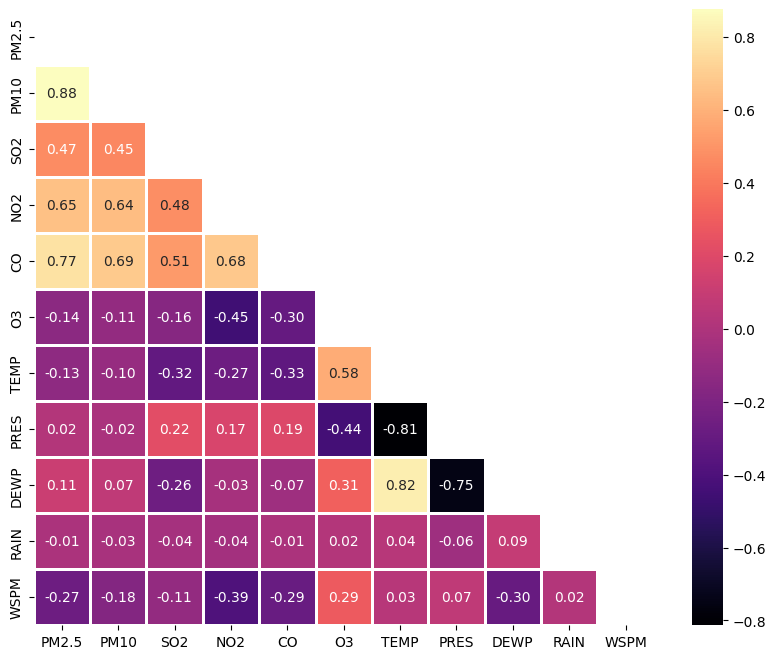

In [14]:
korelasi = data_all.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(korelasi))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap='magma', linewidths=1, mask=mask)

# plt.title("Peta Korelasi Antar Kolom Numerik")
plt.show()

1.  Terdapat hubungan sangat kuat antara partikel halus (PM2.5) dan partikel kasar (PM10), Keduanya cenderung meningkat bersamaan.

2.  Polutan jenis karbon monoksida (CO) berkorelasi positif kuat dengan PM2.5 dan PM10, menunjukkan bahwa pembakaran tidak sempurna dari bahan bakar fosil adalah sumber utama polutan ini.

3.  tingkat ozon (O3) berkorelasi rendah negatif dengan jenis polutan lainnya seperti PM2.5, PM10, SO2, NO2, CO.

4.  ketika tekanan atmosfer (PRES) turun, suhu (TEMP) dan titik embun (DEWP) naik secara bersamaan. Menunjukkan hubungan cuaca pada umumnya

5.  Kecepatan angin yang tinggi (WSPM) tidak berkaitan langsung dengan peningkatan polutan yang artinya kecepatan angin tidak terlalu mempengaruhi penyebarkan polutan udara.

6.  curah hujan (RAIN) adalah variabel yang tidak memiliki pengaruh signifikan terhadap semua variabel baik itu variabel meteorologi maupun variabel polutan

7. faktor meteorologi seperti tekanan armosfer, suhu, titik embun, kecepatan angin bahkan curah hujan tidak secara langsung mempengaruhi peningkatan polusi udara namun berkorelasi dengan polutan jenis ozon (O3)

### Pertanyaan 1.B jenis polutan apa yang paling dominan dalam beberapa tingkat kualitas udara

In [17]:
# tabel frekuensi kejadian polutan tertentu di berbagai tingkat kategori AQI
tabel_polutan = pd.crosstab(data_all["kategori"], data_all["polutan"]).reindex(index=kategori_AQI)
tabel_polutan.drop(columns="clean", index='Good', inplace=True)
tabel_polutan

polutan,CO,NO2,O3,PM10,PM2.5,SO2
kategori,,,,,,
Moderate,9573,1270,12230,2136,52602,119
Unhealthy for Sensitive Groups,5069,635,19917,779,31418,50
Unhealthy,6400,0,19724,459,70643,9
Very Unhealthy,44390,0,43527,512,31981,36
Hazardous,18413,0,14095,992,19168,0


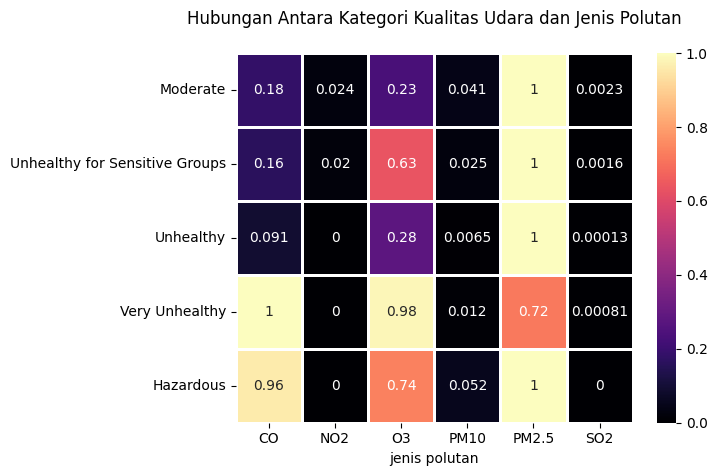

In [18]:
normalisasi = tabel_polutan.div(tabel_polutan.max(axis=1),axis=0)

sns.heatmap(normalisasi, annot=True, cmap="magma", linewidths=1)
plt.title("Hubungan Antara Kategori Kualitas Udara dan Jenis Polutan\n")
plt.xlabel("jenis polutan")
plt.ylabel(None)
plt.show()

1. PM2.5 adalah polutan yang paling berpengaruh dalam penurunan kualitas udara dibanding PM10 yang berarti partikel halus lebih banyak tersebar dibanding partikel kasar ini sangat berbahaya karena PM2.5 mampu masuk lebih dalam ke saluran pernapasan hingga ke aliran darah dibanding PM10.

2. kenaikan kadar gas polutan CO sangat jarang terjadi pada tingkat moderate hingga unhealthy namun sering terjadi pada tingkat yang paling very unhealthy dan hazardous, ini menunjukkan bahwa kenaikan gas CO tidak alami, ada faktor eksternal yang begitu masif dalam satu waktu yang sama sehingga menyebabkan kadar CO langsung meningkat ke tahap berbahaya

3. SO2 dan NO2 adalah polutan yang tidak terlalu berpengaruh pada sebagian besar tingkat kualitas udara. Dilihat dari tabel frekuensinya, kedua gas tersebut sering meningkat sampai tahap sedang dan tidak sampai ke tahap yang membahayakan

### Pertanyaan 1.C apakah arah angin juga mempengaruhi persebaran polutan ke berbagai lokasi

In [39]:
# uji pengaruh arah mata angin dengan tingkat kualitas udara
mata_angin = np.array(["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
tabel_kontingensi = pd.crosstab(data_all["kategori"], data_all["wd"]).reindex(columns=mata_angin)

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(tabel_kontingensi)
print("Hasil Uji Chi-Square:")
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Derajat Bebas: {dof}")

if p < 0.05:
    print("\nHasil: Terdapat hubungan signifikan antara variabel.")
else:
    print("\nHasil: Tidak ada hubungan signifikan antara variabel.")

Hasil Uji Chi-Square:
Chi-Square: 42075.69335178447
P-Value: 0.0
Derajat Bebas: 75

Hasil: Terdapat hubungan signifikan antara variabel.


karena variabel mata angin mempunyai hubungan yang signifikan terhadap penurunan kualitas udara, maka dapat dilanjut untuk menganalisis hasil residual standar dari tabel kontingensi tersebut

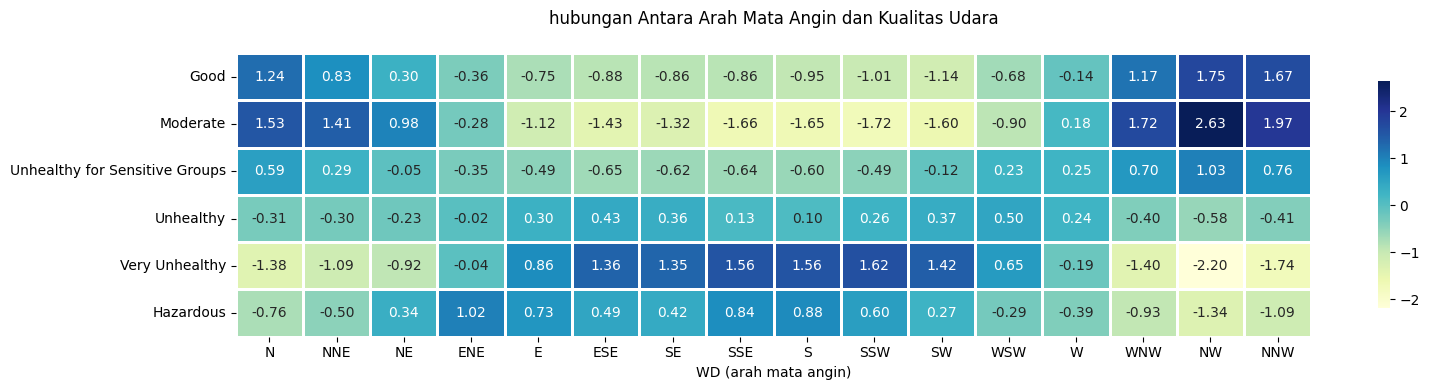

In [40]:
observed = tabel_kontingensi.values

P_col = np.sum(expected, axis=0, keepdims=True) / np.sum(expected)  # Proporsi kolom
P_row = np.sum(expected, axis=1, keepdims=True) / np.sum(expected)  # Proporsi baris
residuals = (observed - expected) / np.sqrt(expected * (1 - P_col) * (1 - P_row))

# Normalisasi residual ke skala z-score
residuals_zscore = (residuals - np.mean(residuals)) / np.std(residuals)

# Create a DataFrame for standardized residuals
residuals_df = pd.DataFrame(residuals_zscore, index=tabel_kontingensi.index, columns=tabel_kontingensi.columns)

plt.figure(figsize=(16, 4))
sns.heatmap(residuals_df, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("hubungan Antara Arah Mata Angin dan Kualitas Udara\n")
plt.xlabel("WD (arah mata angin)")
plt.ylabel(None)
plt.tight_layout()
plt.show()

tahap selanjutnya melihat distribusi arah mata angin dan kecepatan angin

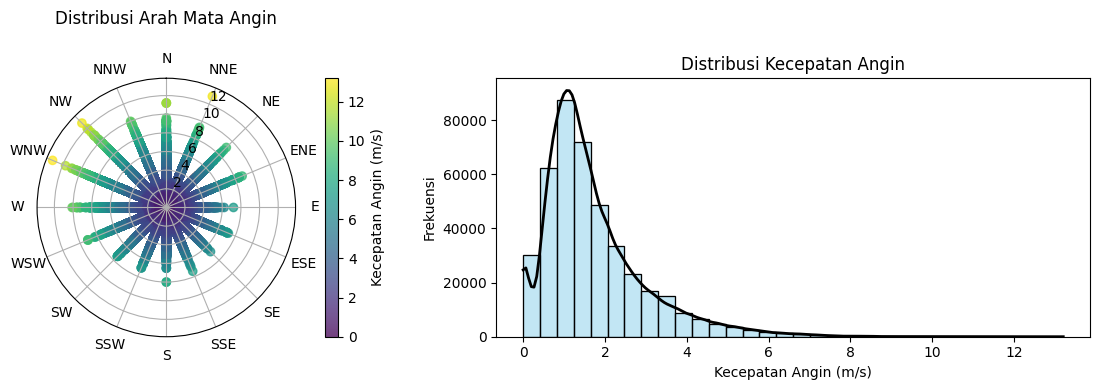

In [42]:
# Data untuk arah dan kecepatan angin
theta = np.deg2rad(data_all['wd'].cat.codes * 22.5)  # Konversi arah angin ke radian
r = data_all['WSPM']  # Kecepatan angin

# Membuat figure
fig = plt.figure(figsize=(13, 4))

# Grafik polar untuk arah angin dan kecepatan
ax_polar = fig.add_subplot(121, projection='polar')
scatter = ax_polar.scatter(theta, r, c=r, cmap='viridis', alpha=0.75)
ax_polar.set_theta_direction(-1)
ax_polar.set_theta_offset(np.pi / 2.0)
ax_polar.set_xticks(np.linspace(0, 2 * np.pi, len(mata_angin), endpoint=False))
ax_polar.set_xticklabels(mata_angin)
ax_polar.set_title('Distribusi Arah Mata Angin', pad=20)  # Tambahkan padding pada judul
plt.colorbar(scatter, ax=ax_polar, label='Kecepatan Angin (m/s)')

# Grafik histogram untuk distribusi kecepatan angin
ax_hist = fig.add_subplot(122)
sns.histplot(r, bins=32, kde=True, ax=ax_hist, color='skyblue',
             line_kws = {'linewidth':2}).lines[0].set_color('black')

ax_hist.set_title('Distribusi Kecepatan Angin')
ax_hist.set_xlabel('Kecepatan Angin (m/s)')
ax_hist.set_ylabel('Frekuensi')

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

1. dari hasil uji statistik diatas dapat dilihat bahwa adanya hubungan yang signifikan antara kualitas udara dengan arah mata angin dengan tingkat signifikansi 5%.

2. Polusi udara dengan kategori buruk hingga sangat berbahaya lebih sering terjadi pada arah angin ENE (timur-timur laut) dan WSW (barat-barat daya). Sebaliknya, kualitas udara yang baik lebih sering terjadi dari arah WNW (barat-barat laut) sampai NNE (utara-timur laut)

3. W (barat), NE (timur laut), ENE (timur-timur laut) sedikit mempengaruhi keseluruhan kualitas udara namun berkontribusi pada bagian tingkat tertentu seperti NE dengan nilai signifikansi 0.98 di tingkat moderate dan ENE dengan nilai signifikansi mencapai 1.02 hazardous

4. distribusi kecepatan angin didominasi pada interval 1-2 m/s, ini berarti polutan pada tiap stasiun tidak dipengaruhi oleh wilayah lain walau pada sedikit kasus kecepatan angin meningkat hingga 13m/s

### Pertanyaan 2.A bagaimana distribusi kualitas udara diberbagai lokasi

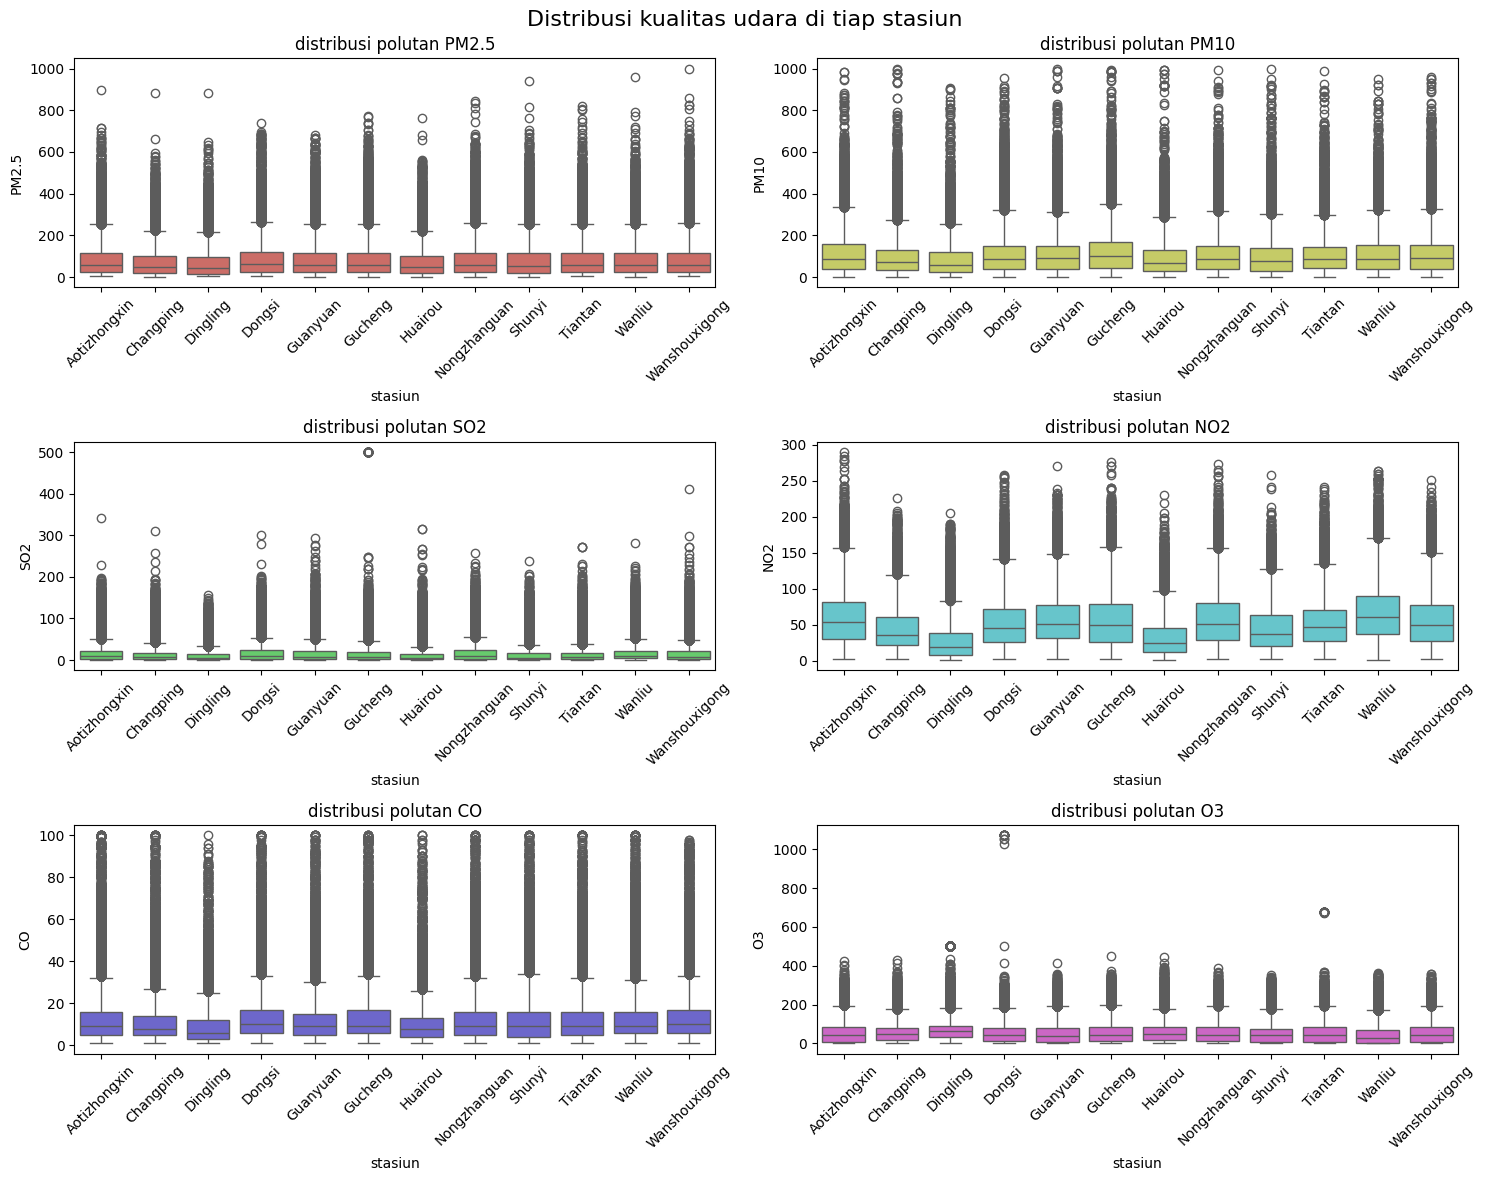

In [43]:
# tetapkan variabel polutan
parameters = np.array(["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"])

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribusi kualitas udara di tiap stasiun', fontsize=16)

# Loop melalui parameter dan plot boxplot
for ax, parameter, color in zip(axes.flat, parameters, sns.color_palette("hls", len(parameters))):
    sns.boxplot(x='station', y=parameter, data=data_all, ax=ax, color=color)
    ax.set_title(f'distribusi polutan {parameter}')
    ax.set_xlabel('stasiun')
    ax.set_ylabel(parameter)
    ax.tick_params(axis='x', rotation=45)  # Rotasi label x-axis

# Sesuaikan layout
plt.tight_layout()

# Tampilkan plot
plt.show()

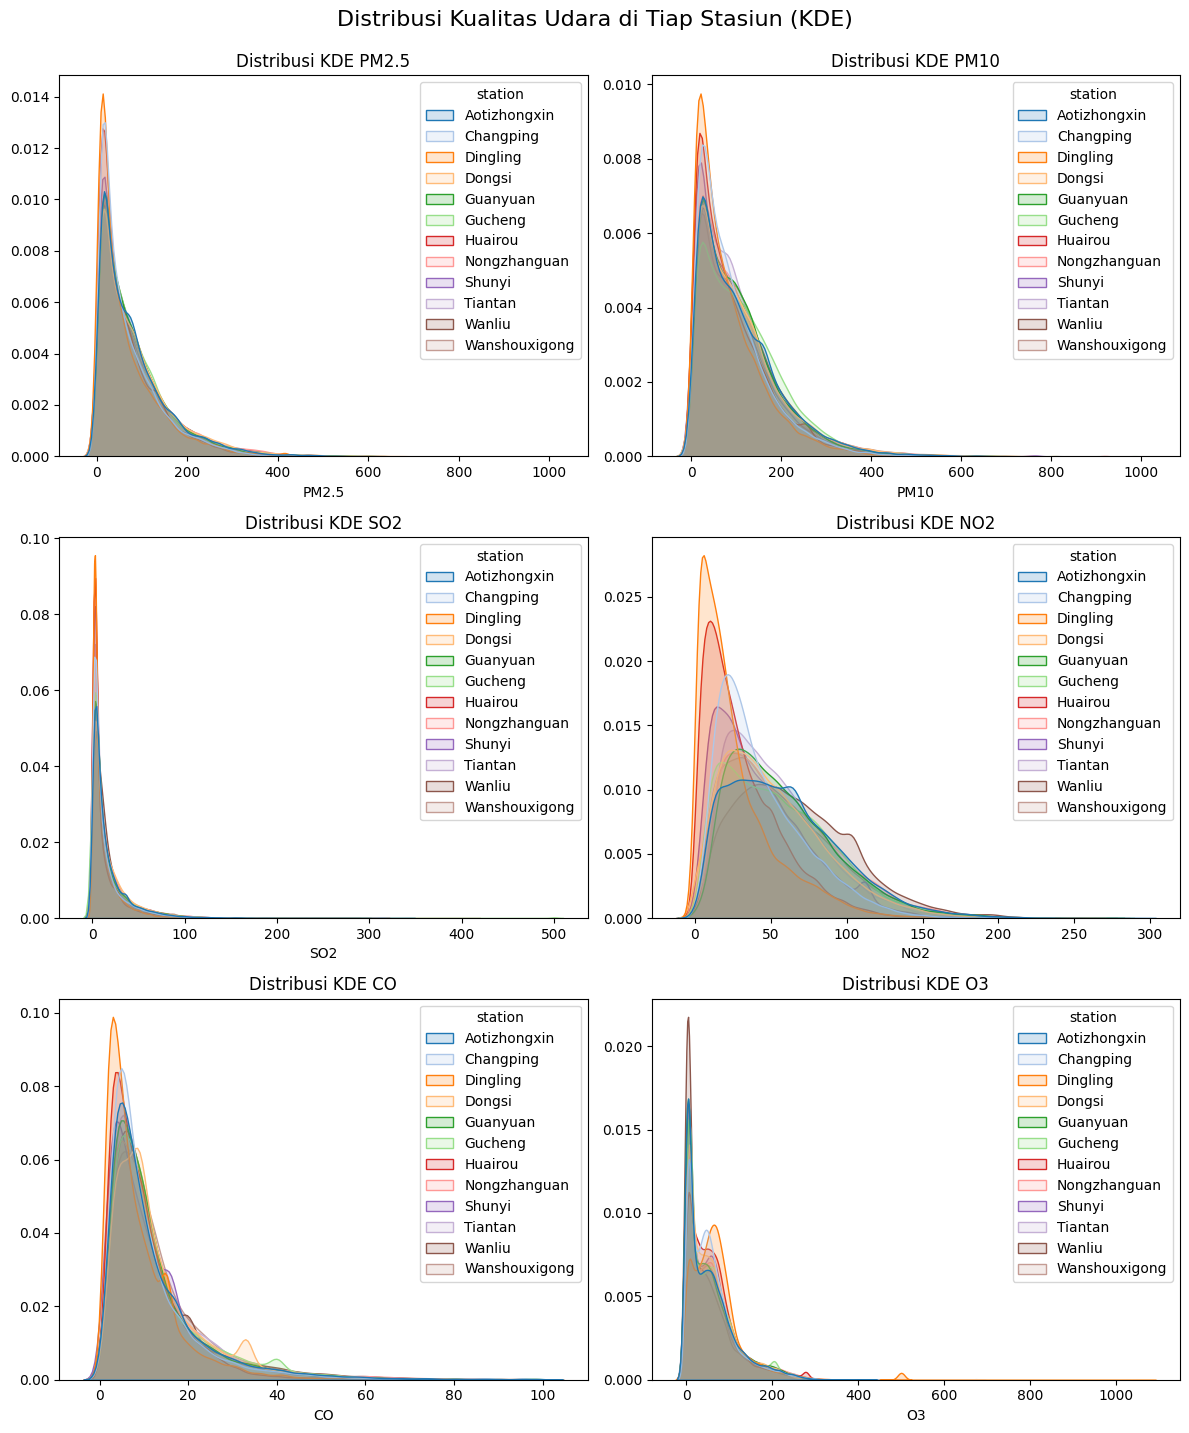

In [44]:
plt.figure(figsize=(12, 14))

for i, polutan in enumerate(parameters):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data=data_all, x=polutan, hue="station",
                fill=True,
                common_norm=False,
                palette=sns.color_palette("tab20")[:12],
                alpha=0.2)
    plt.title(f"Distribusi KDE {polutan}")
    plt.xlabel(polutan)
    plt.ylabel(None)

plt.tight_layout()
plt.suptitle("Distribusi Kualitas Udara di Tiap Stasiun (KDE)", fontsize=16, y=1.02)
plt.show()

1. Polutan seperti O3 dan NO2 menunjukkan pola distribusi yang lebih bervariasi antar stasiun. Misalnya, stasiun tertentu memiliki distribusi lebih lebar atau puncak distribusi di lokasi berbeda dibandingkan stasiun lainnya.

2. Untuk beberapa polutan, pola distribusi antar stasiun cukup mirip (misalnya PM2.5, PM10 dan SO2), yang dapat mengindikasikan sumber emisi yang konsisten di semua lokasi.

3. pada stasiun Dongsi dan Gucheng terjadi peningkatan frekuensi CO yang tidak wajar antara rentang 30-45, dan juga pada stasiun Dingling terjadi peningkatan frekuensi O3 sekitar 500. Hal ini mungkin menunjukkan kondisi episodik seperti polusi ekstrem.

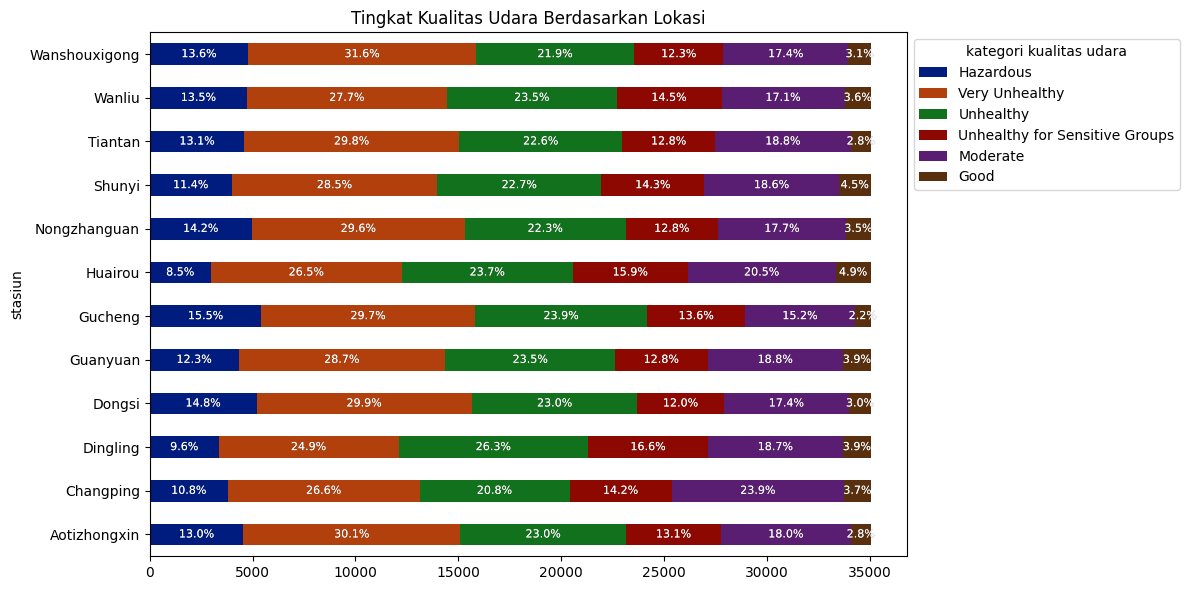

In [45]:
# kemudian ubah urutan kolom kategori kualitas udara agar grafik lebih interaktif
grouped_data = pd.crosstab(data_all["station"], data_all["kategori"]).reindex(columns=kategori_AQI[::-1])
totals = grouped_data.sum(axis=1)

# Plot grafik batang bertumpuk
fig, axes = plt.subplots(figsize=(12, 6))
bars = grouped_data.plot(kind="barh", stacked=True, color=sns.color_palette("dark"), ax=axes)

# memberikan nilai persentase untuk setiap lokasi didalam grafik
for i, bar_group in enumerate(bars.containers):
  for bar in bar_group:
      width = bar.get_width()
      if width > 0:
          persentase = width/totals.iloc[i] * 100 # perhitungan persentase kategori
          # mengatur teks nilai persentase untuk dimasukkan ke dalam grafik perbatang kategori
          text = axes.text(
              bar.get_x() + width / 2,
              bar.get_y() + bar.get_height() / 2,
              f'{persentase:.1f}%',
              ha='center', va='center',
              fontsize=8, color='white'
          )
          text.set_path_effects([
              path_effects.Stroke(linewidth=0.1, foreground='black'),
              path_effects.Normal()
          ])

# Tambahkan judul dan label
plt.title("Tingkat Kualitas Udara Berdasarkan Lokasi")
plt.xlabel(None)
plt.ylabel("stasiun")
plt.legend(title="kategori kualitas udara", bbox_to_anchor=(1, 1), loc='upper left')

# Atur layout agar lebih rapi
plt.tight_layout()
plt.show()

1. Tingkat polusi udara di berbagai lokasi sangat mengkhawatirkan, dengan sebagian besar lokasi memiliki porsi very unhealthy dan hazardous yang tinggi. Tidak ada satu lokasi pun yang dominan memiliki kualitas udara baik, hanya sebagian kecil dari total udara yang dikategorikan good.

3. Lokasi seperti Dingling, Shunyi, dan Huairou sedikit lebih baik dibanding lokasi lainnya karena memiliki persentase kategori moderate dan good yang lebih tinggi sementara lokasi dengan proporsi very unhealthy dan hazardous yang tinggi berada di lokasi seperti Nongzhanguan, Dongsi, dan Gucheng

### Pertanyaan 2.B bagaimana pola temporal gas polutan dari harian, bulanan, dan tahunan

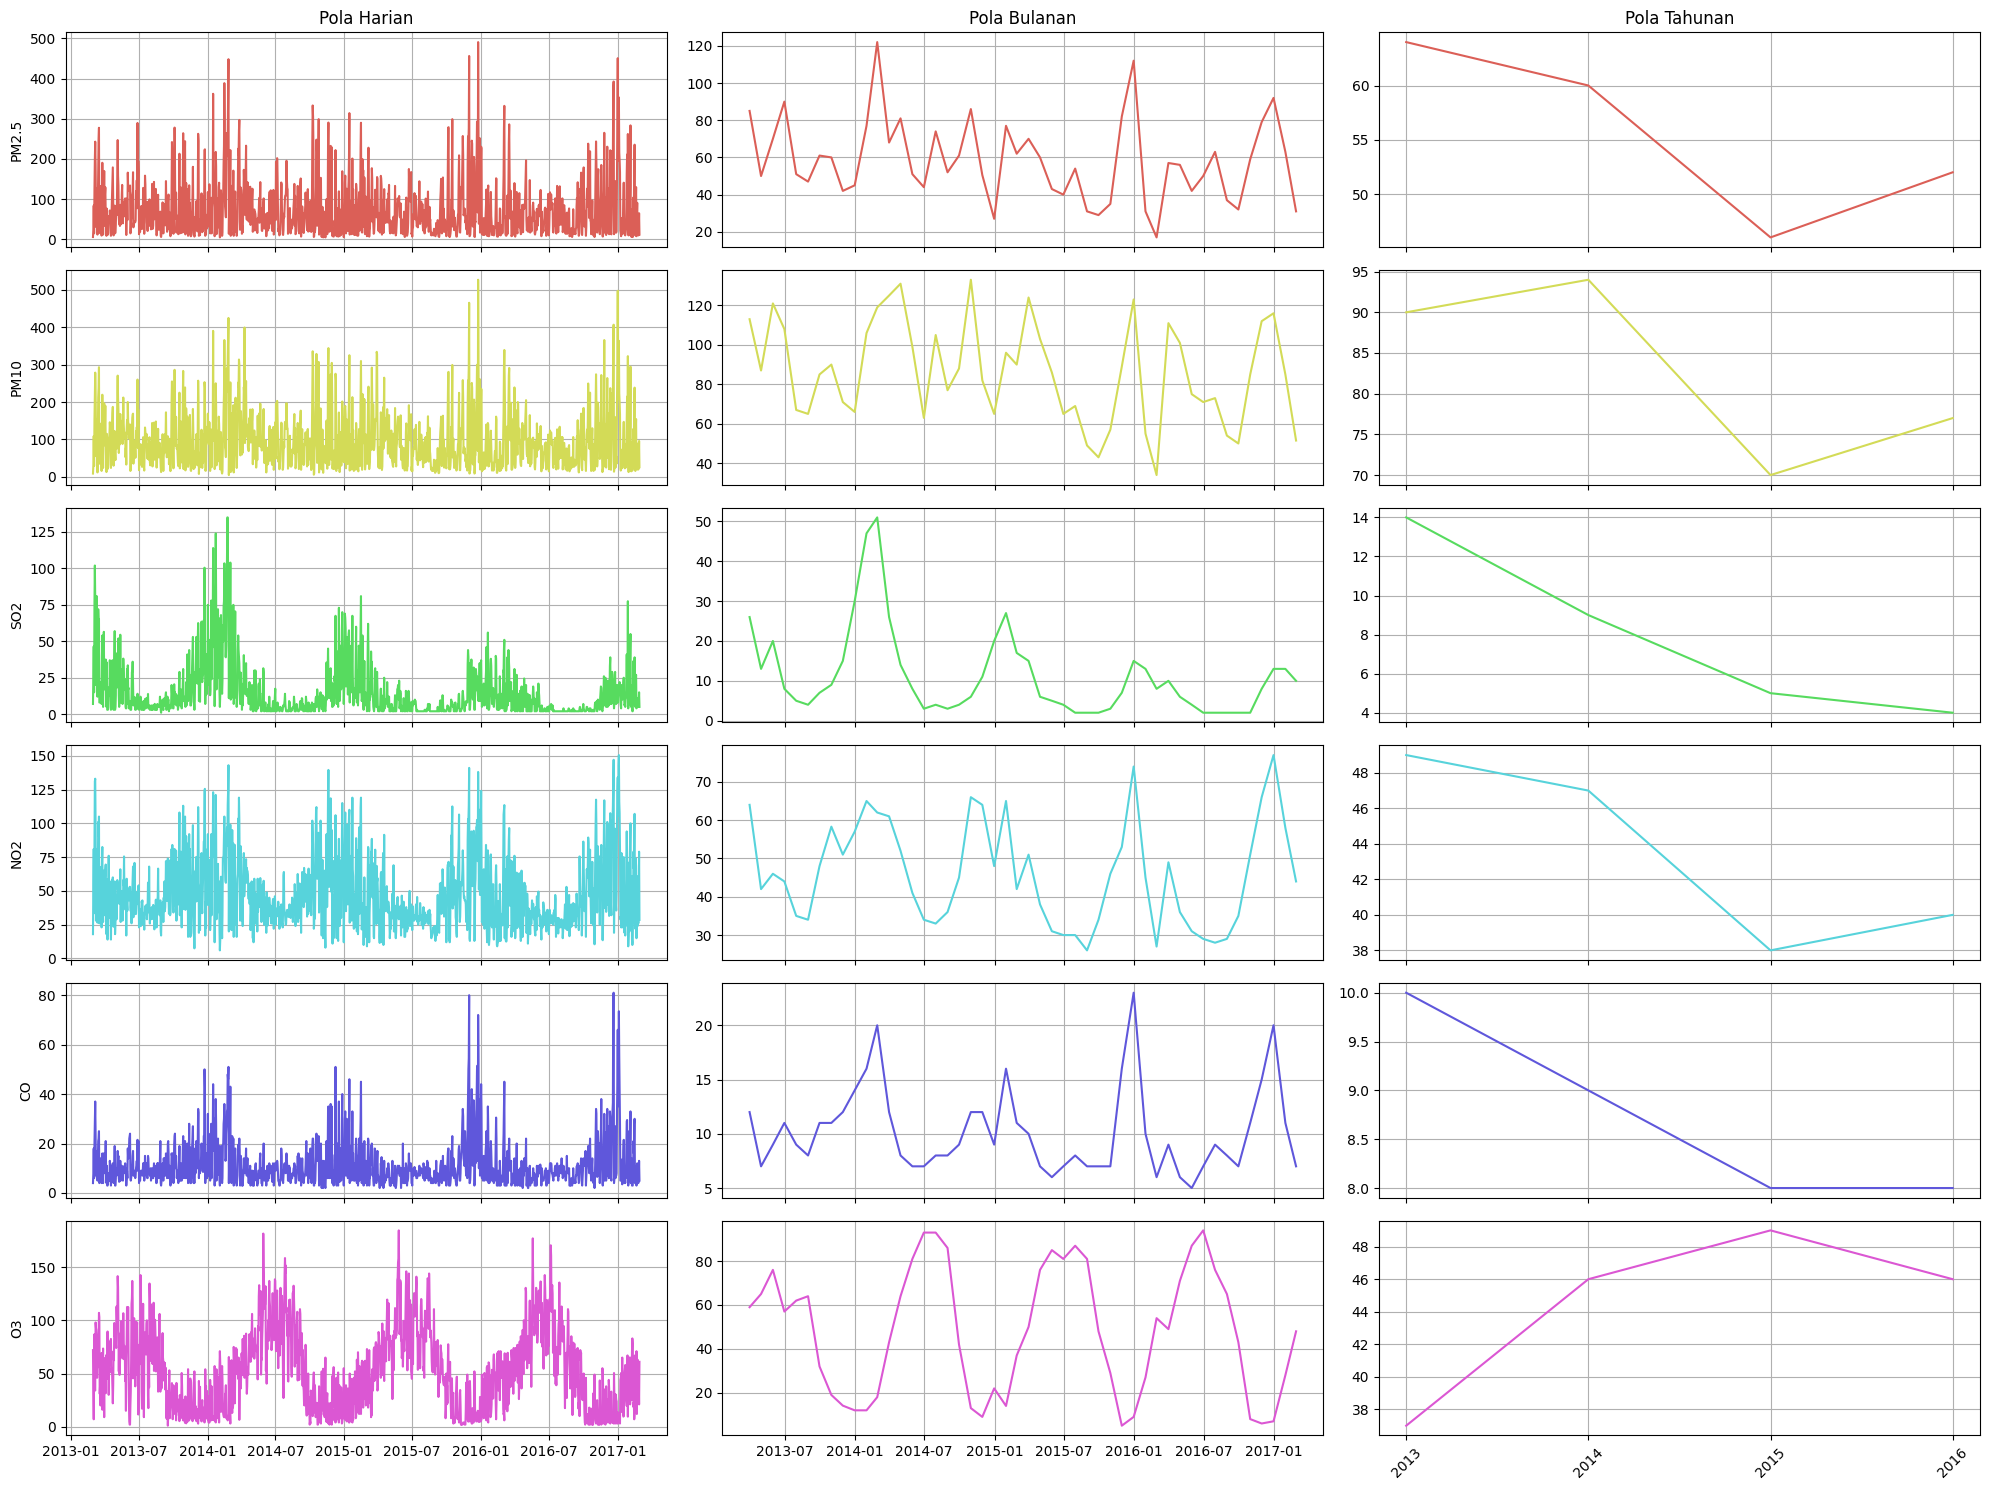

In [46]:
daily_tren = data_all[parameters].resample('D').median()
monthly_tren = data_all[parameters].resample('ME').median()
yearly_tren = data_all[parameters].resample('366D').median()
# resample('366D') dilakukan agar data yang terhitung genap 1 tahun, bukan berdasarkan tahunnya
colors = sns.color_palette("hls", len(parameters))

# bentuk subplot untuk tiap waktu, polutan sebagai baris dan waktu sebagai kolom
fig, axes = plt.subplots(6, 3, figsize=(20, 15), sharex='col')

timeframes = {
    "Harian": daily_tren,
    "Bulanan": monthly_tren,
    "Tahunan": yearly_tren
}


for i, par in enumerate(parameters):
    for j, (time_label, tren_data) in enumerate(timeframes.items()):
        ax = axes[i, j]
        ax.plot(tren_data.index, tren_data[par], label=par, color=colors[i])
        ax.set_title(f'Pola {time_label}' if i == 0 else "")
        ax.set_ylabel(par if j == 0 else "")
        ax.grid(True)

        # Format sumbu x khusus untuk tahunan (kolom ke-3)
        if j == 2:  # Kolom ke-3 (Yearly)
            ticks = yearly_tren.index  # Ambil index tahunan
            ax.set_xticks(ticks)  # Tetapkan lokasi tick
            ax.set_xticklabels([tick.year for tick in ticks], rotation=45)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

1. terjadi lonjakan yang sangat tinggi pada tahun 2014 bulan januari sampai juli pada semua jenis polutan, pada tahun 2016 bulan januari juga mengalami peningkatan yang tinggi namun tidak untuk polutan jenis SO2 mengamali penurunan

2. Tren tahunan menunjukkan adanya perbaikan kualitas udara untuk beberapa polutan namun pada tahun 2016-2017 mengalami sedikit peningkatan, dan untuk polutan jenis SO2 mengalami penurunan yang signifikan setiap tahunnya

3. di setiap musim panas terjadi peningkatan Ozon (O3) dan pola tren tahunan menunjukkan perubahan yang sedikit, hal ini adalah gejala umum karena dipengaruhi oleh faktor meteorologi. Tetapi polutan lainnya meningkat disetiap musim dingin, ini mengindikasikan aktivitas manusia di musim dingin sangat masif terutama di bulan januari

### Pertanyaan 2.C bagaimana tingkat kualitas udara di berbagai lokasi berdasarkan pola bulanannya

In [51]:
# membuat dataset untuk tren bulanan
bulanan = data_all.groupby("station")["kategori"].resample('ME').apply(lambda x: x.mode()[0])
bulanan = bulanan.reset_index()

# menambahkan variabel bulan dalam bentuk kategorik
bulan = pd.Categorical(bulanan['datetime'].dt.strftime('%b'),
                       categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                       ordered=True)
# menambahkan variabel kategori pada dataset bulanan dengan tipe data kategorik
kategori = pd.Categorical(bulanan['kategori'],
                          categories=kategori_AQI,
                          ordered=True)

bulanan['bulan'] = bulan
bulanan['kategori'] = kategori
bulanan.drop(columns='datetime', inplace=True) # membuang variabel datetime

<ipython-input-51-fb0e0df81225>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulanan = data_all.groupby("station")["kategori"].resample('ME').apply(lambda x: x.mode()[0])


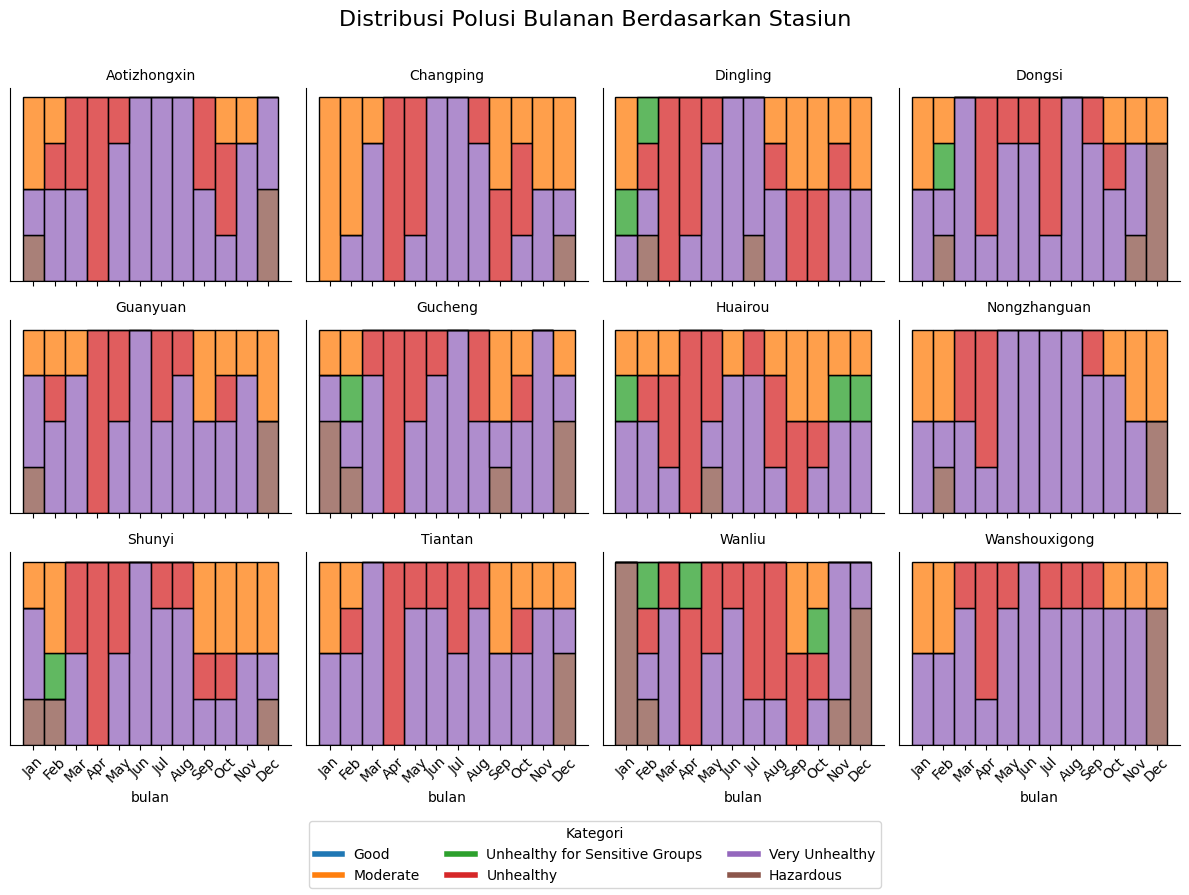

In [48]:
# visualisasi menggunakan Facetgrid dengan tiap subplot adalah stasiun
g = sns.FacetGrid(bulanan, col='station', col_wrap=4, height=3, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, hue='kategori', x='bulan', multiple="stack")
g.set_titles(col_template="{col_name}")  # Mengatur judul subplot berdasarkan nama stasiun

# menambahkan legenda ke dalam grafik
handles = [plt.Line2D([0], [0], color=i, lw=4) for i in sns.color_palette('tab10', 6)]
g.fig.legend(handles, kategori_AQI, loc='lower center', title="Kategori", ncol=3)
g.fig.suptitle("Distribusi Polusi Bulanan Berdasarkan Stasiun", fontsize=16) # menambahkan judul utama

# Rotasi label sumbu-x untuk keterbacaan
for ax in g.axes.flat:
  ax.yaxis.set_visible(False)
  ax.tick_params(axis='x', rotation=45)

# # Menyesuaikan tata letak
plt.tight_layout(rect=[0, 0.08, 1, 0.97])
plt.show()

grafik diatas adalah grafik frekuensi rata-rata kategori kualitas udara di tiap bulannya selama 4 tahun penuh mulai dari 2013 sampai 2017 (dari atas kebawah).

1. tidak ada satu pun bulan yang menunjukkan rata-rata kualitas udara kategori good. Namun Sebagian besar stasiun menunjukkan dominasi kategori unhealthy hingga very unhealthy, terutama selama musim tertentu. Hal ini mengindikasikan bahwa kualitas udara sering kali berada dalam kondisi yang berbahaya bagi kesehatan masyarakat

2. hampir semua stasiun di bulan april mengalami unhealthy dan di bulan juni mengalami very unhealthy berturut-turut, mengindikasikan bahwa pada bulan tersebut kualitas udara sedang atau rentan

3. pada periode musim dingin yaitu antara november sampai februari kualitas udara sangat membahayakan ditandai dengan adanya frekuensi hazardous diujung-ujung grafik. Pada periode musim panas yaitu antara mei sampai agustus kualitas udara lebih sering berada di tingkat very unhealthy dan jarang terjadi peningkatan hazardous, mengindikasikan bahwa pada musim panas terjadi perbaikan kualitas udara

4. pada stasiun Huairo, frekuensi hazardous hanya sekali terjadi yaitu di bulan mei, begitu juga pada stasiun Chingping di bulan desember.



### Pertanyaan 2.D bagaimana tingkat kualitas udara di berbagai lokasi berdasarkan pola hariannya

pada pertanyaan ini akan diuji menggunakan data PM2.5 karena polutan tersebut yang paling dominan di berbagai tingkat kualitas udara (pertanyaan 1.B) dan distribusi datanya hampir sama diberbagai lokasi (pertanyaan 2.A), kemudian karena menurut pola bulanannya, kualitas udara lebih sering berada ditingkat unhealthy (pertanyaan 2.C) maka digunakan batas atas kuartil dari data PM2.5 untuk mengklasifikasi data harian tersebut

<ipython-input-49-e20f708c94c6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  harian = data_all.groupby('station')['PM2.5'].resample('D').max().reset_index()
<ipython-input-49-e20f708c94c6>:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = frekuensi.pivot_table(


Text(0.5, 1.0, 'Distribusi Polusi Harian Berdasarkan Stasiun\n')

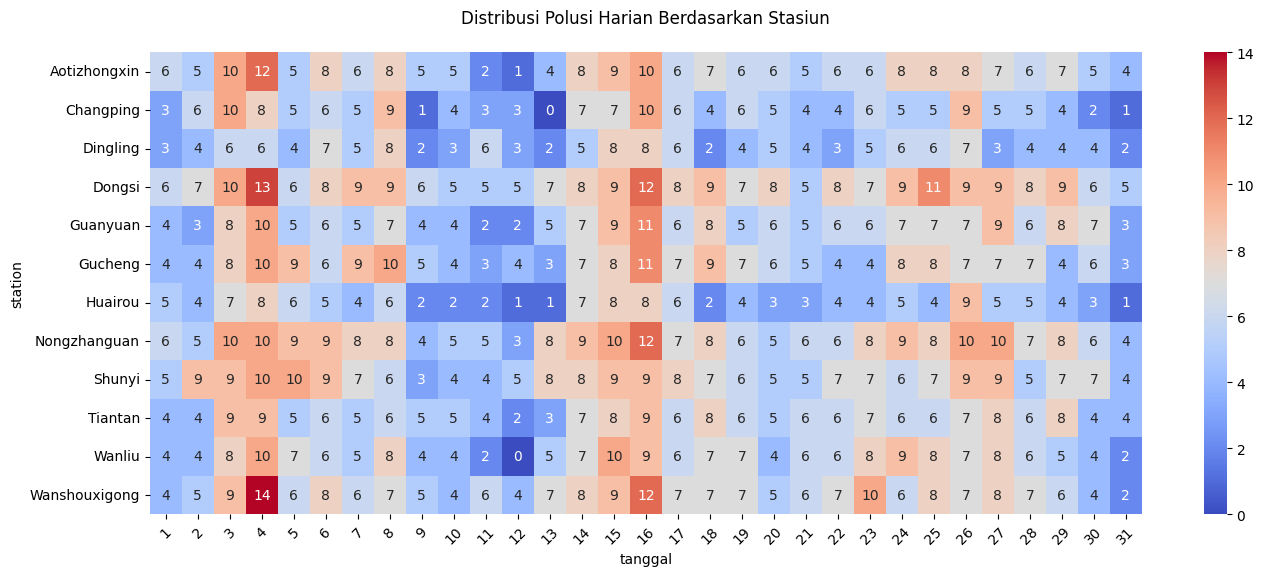

In [49]:
# grup data berdasarkan pola hariannya dan ambil data dengan nilai paling tinggi
harian = data_all.groupby('station')['PM2.5'].resample('D').max().reset_index()

# Identifikasi batas pencilan berdasarkan IQR
q1 = data_all['PM2.5'].quantile(0.25)
q3 = data_all['PM2.5'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr # variabel untuk treshold klasifikasi

frekuensi = harian[harian['PM2.5'] > upper_bound].copy()
frekuensi['tanggal'] = frekuensi['datetime'].dt.day

# Buat tabel pivot
pivot_table = frekuensi.pivot_table(
    index='station',
    columns='tanggal',
    values='PM2.5',
    aggfunc='count',
    fill_value=0
)

# visualisasi dengan heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.tick_params(axis='x', rotation=45)
plt.title("Distribusi Polusi Harian Berdasarkan Stasiun\n")

grafik diatas adalah frekuensi terjadinya peningkatan PM2.5 diambang batas kuartil dengan setiap angka mewakili jumlah kejadian selama 4 tahun.

1. tanggal 4 adalah adalah yang paling sering terjadi penurunan kualitas udara dengan frekuensi rata-rata kejadian sebesar 10, dan wanshouxigong adalah stasiun yang paling sering terdampak ditanggal tersebut dengan frekuensi 14

2. PM2.5 lebih sering meningkat di tanggal 3-5 dan kemudian turun perlahan hingga tanggal 13

3. mulai dari tanggal 14 sampai akhir bulan, peningkatan kadar PM2.5 ber fluktuasi, tanggal 14-18 terjadi peningkatan, tanggal 19-22 terjadi penurunan, tanggal 23-29 terjadi peningkatan kembali dan pada tanggal 30-2 kembali menurun

4. tanggal 4 dan tanggal 16 adalah yang paling sering mengalami penurunan kualitas udara, dan periode 9-12 adalah saat dimana kualitas udara membaik

5. Wanshouxigong, Nongzhuang, dan Dongsi adalah 3 stasiun teratas yang mengalami peningkatan kadar PM2.5 paling sering atau dengan kata lain stasiun ini adalah stasiun yang sering tercemar setiap harinya. Tiantan, Dingling dan Huairou adalah stasiun yang paling jarang terjadi peningkatan kadar PM2.5




In [50]:
# total_stasiun = pivot_table.sum(axis=1)
# total_harian = pivot_table.sum(axis=0)

pivot_table.T.describe()

station,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,6.419355,5.096774,4.677419,7.838710,6.064516,6.354839,4.451613,7.387097,6.903226,5.935484,6.000000,6.806452
std,2.262362,2.494726,1.832796,2.050964,2.189908,2.302873,2.218689,2.185977,1.955417,1.787652,2.380476,2.400269
min,1.000000,0.000000,2.000000,5.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000
25%,5.000000,4.000000,3.000000,6.000000,5.000000,4.000000,3.000000,6.000000,5.000000,5.000000,4.000000,5.500000
50%,6.000000,5.000000,4.000000,8.000000,6.000000,7.000000,4.000000,8.000000,7.000000,6.000000,6.000000,7.000000
75%,8.000000,6.000000,6.000000,9.000000,7.000000,8.000000,6.000000,9.000000,9.000000,7.000000,8.000000,8.000000
max,12.000000,10.000000,8.000000,13.000000,11.000000,11.000000,9.000000,12.000000,10.000000,9.000000,10.000000,14.000000


## Conclusion

- Conclution pertanyaan 1
  hubungan antara polutan tinggi terutama antara polutan jenis PM2.5 dengan PM10 yang mencapai tingkat korelasi 0.88 atau R^2 = 0.77%, namun polutan jenis O3 tidak memiliki hubungan yang kuat antara polutan lain bahkan berkorelasi negatif, namun polutan tersebut berhubungan kuat positif dengan variabel-variabel meteorologi seperti temperatur dengan korelasi paling tinggi yaitu 0.58. data seperti suhu, tekanan, dan titik embun saling berkorelasi masing-masing namun tidak dengan variabel polutan, paling tinggi yaitu kecepatan angin dengan NO2 sebesar -0.39 yang menunjukkan bahwa data tentang suhu, tekanan, titik embun tidak mempengaruhi besar kecilnya konsentrat polutan selain O3. Di antara semua variabel numerik yang ada, curah hujan adalah variabel yang tidak berkorelasi apapun terhadap semua variabel bahkan tingkat korelasi tertinggi sebesar 0.09 atau dalam R^2 = 0.81% yang bahkan dibawah 1%, itu artinya baik tingkat konsentrat ataupun data cuaca lainya tidak saling mempengaruhi dan dipengaruhi oleh curah hujan besar ataupun kecil.
  
  untuk data kategorik seperti tingkat kualitas udara, arah mata angin, dan polutan tertinggi memiliki korelasinya masing-masing, untuk tingkat kualitas udara dengan polutan tertinggi, ternyata kualitas udara yang buruk di dominasi oleh tingkat CO yang tinggi dan juga PM2.5 yang tinggi, namun CO pada tingkat sedang dan baik seperti Unhealthy sangat jarang terjadi bahkan dengan rasio 0.091 terhadap polutan lain. Untuk polutan jenis NO2 tingkat tertingginya hanya sampai di unhealthy for sensitive groups saja yang artinya masih aman, SO2 adalah polutan yang tersebar diberbagai tingkat kualitas udara namun frekuensi kemunculannya sangat sedikit. O3 adalah polutan dengan fluktuasi beragam di berbagai tingkat mulai dari moderate hingga hazardous.

  melihat dari hubungan antara tingkat kualitas udara dengan arah mata angin, hubungan mereka sangat signifikan, dan dilihat dari hasil analisis tabel kontingensi dengan menghitung nilai residual standar adjusted, maka mulai dari arah barat hingga timur laut, kualitas udaranya baik. Sebaliknya, mata angin dari timur laut ke barat kualitas udaranya buruk. Jika dilihat dari hubungan distribusi kecepatan angin dan arah mata angin sepertinya hubungan antara kualitas udara dan arah mata angin sangat lemah karena kecepatan angin dominan berapa pada skala interval 1 m/s hingga 2 m/s yang artinya sangat minim terjadi persebaran polutan ke berbagai stasiun dan jika dilihat dari arah kecepatan angin tertinggi dan hubungan tertinggi antara arah mata angin dan tingkat kualitas udara sepertinya memang tidak terlalu berhubungan.
  
  maka dapat disimpulkan bahwa polutan yang berada pada stasiun tersebut tidak dipengaruhi oleh polutan yang berada di stasiun lainnya, faktor peningkatan udara yang ada pada stasiun tersebut tidak dipengaruhi oleh faktor eksternal bahkan kondisi cuaca sekalipun. dan jika dilihat dari polutan dominan yaitu CO yang mana berasal dari suatu pembakaran, maka tingkat kualitas udara di masing-masing stasiun sangat dipengaruhi oleh jumlah kendaraan dan aktivitas manusia di sana

- Conclution pertanyaan 2

  distribusi masing masing polutan terpusat dititik median dengan titik berat di ujung ekor dari hitogram, maka dapat disimpulkan bahwa data berdistribusi eksponensial atau berdistribusi gamma, hal ini wajar untuk data time series yang memiliki pola musiman seperti pada grafik tren data waktu ke waktu yang mana pada musim dingin polutan selalu meningkat dan pada musim panas polutan menurun tapi terbalik dengan polutan O3 yang meningkat di musim panas.

  dilihat dari proporsi kualitas udara di masing-masing stasiun maka stasiun terburuk adalah gucheng, dongsi dan nongzhanguan, dan stasiun terbersih adalah huairou, shunyi, dingling. Dilihat dari pola bulanannya maka stasiun terburuk adalah  aotizhongxin, nongzhanguan dan wanshouxigong sementara stasiun terbaik adalah huairou, dingling dan shunyi. Dilihat dari pola hariannya maka stasiun terburuk adalah nongzhanguan, wanshouxigong dan dongsi, untuk stasiun terbaik adalah huairou, dingling dan changping.
  
  dari ketika hasil tersebut maka predikat stasiun terbersih adalah huairou, dingling dan shunyi. Untuk stasiun dengan udara terburuk adalah nongzhanguan, wanshouxigong dan dongsi

In [53]:
pip freeze > requirements.txt